This notebook contains code to plot scatterplots/boxplots of the accepted gamma distribution parameters by optimal allele

In [10]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/supp_figures/opt_allele_scatter_boxplots/'

Populating the interactive namespace from numpy and matplotlib


In [11]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
        
    print('Running main')
    
    folder = 'motif_analysis_diff_mu_071921'
    fig_num = 0
    per = 2
    
    color_list = ['red','orange','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','gold']
    
    color_list_opt = ['lightskyblue','deepskyblue','blue','midnightblue']
    motif_dic = {}
    motif_dic[2] = ['AC']
    motif_dic[3] = ['AAT']
    motif_dic[4] = ['AAAC']
    motif_dic[5] = ['11']
    
    categories_list = [7,8,9,10,11,12]
    
    func_dic = {}
    func_dic['7'] = 'Coding'
    func_dic['8'] = 'Intron'
    func_dic['9'] = "5'UTR"
    func_dic['10'] = "3'UTR"
    func_dic['11'] = "Promoter"
    func_dic['12'] = "Intergenic"
    
    subplots_dic = {}
    subplots_dic[2] = [(3,4,1),(3,4,2),(3,4,3),(3,4,4),(3,4,5),(3,4,6),(3,4,7),(3,4,8),(3,4,10),(3,4,11)]
    subplots_dic[3] = [(3,3,1),(3,3,2),(3,3,3),(3,3,4),(3,3,5),(3,3,6),(3,3,7),(3,3,8),(3,3,9)]
    subplots_dic[4] = [(2,2,1),(2,2,2),(2,2,3),(2,2,4)]
    
    opt_dic = {}
    opt_dic[2] = [11,14,17,20] 
    opt_dic[3] = [5,8,10,13]
    opt_dic[4] = range(7,11,1)
    opt_dic[5] = [5,8,10,13]
    
    gamma_dic = {}
    color_dic_motif={}
    color_dic_opt={}
    i = -1
    for motif in motif_dic[per]:
        gamma_dic[motif] = []
        i = i + 1
        color_dic_motif[motif] = color_list[i]
            
    # Plot motifs (sep graph for each opt allele)
    plt.figure(2)
    for motif in motif_dic[per]:
        
        opt_alleles = opt_dic[per]
        
        index = -1
        i = -1
        blue = 0
        for opt in opt_alleles:
            i = i + 1
            blue = blue + 0.07
            x = []
            y = []
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            
            file_list = glob.glob('/gymreklab-tscc/bonnieh/joint_method/results_top_x/%s/per_%d_%s*_opt_%s.txt'%(folder, per, motif, opt_string))
            
            file_list.sort() 
            
            base_plot = ''
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[4]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')

                # Uses actual num loci
                num_loci = int(info[2])
                
                if num_acc > 0: # and num_loci >= 10:

                    line = lines[2]
                    info = line.strip().split(': ')
                    column = info[1]
                    column = column.strip().split(' ')
                    column = int(column[0])
                    opt_allele = int(info[3])
                    line = lines[6]
                    info = line.strip().split(',')
                    med_a = float(info[0])
                    med_b = float(info[1])
                    line = lines[10]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    params_list = []

                    
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[0])), float(param[1])))
                        x.append(float(param[0]))
                        y.append(float(param[1]))
                    
                    if column != 'H':
                        line = lines[6]
                        info = line.strip().split(',')
                        k = float(info[0])
                        theta = float(info[1])
                        
                        gamma_dic[motif].append((k, theta, num_loci, opt))
        
                    plt.scatter(x, y, label = opt_string, marker='.')
                    plt.plot(med_a, med_b, marker='*',markeredgecolor= "black",markeredgewidth=3,markersize=20)
    plt.yscale('log')
    #plt.ylim([10**-7,1])
    plt.legend()
    plt.xlabel('a value')
    plt.ylabel('b value')
    #plt.title('Accepted parameters: Optimal allele ' + str(opt_string))
    plt.title('Accepted parameters: Motif ' + str(motif))
    #plt.title('Accepted parameters: %s'%(func_dic[motif]))
    plt.savefig(PLOTDIR + 'scatter_motif_%s.pdf'%(motif),bbox_inches='tight')

    

Running main
CPU times: user 1.26 s, sys: 41 ms, total: 1.3 s
Wall time: 1.41 s


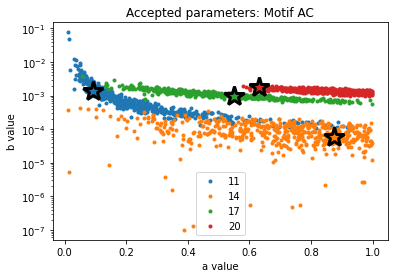

In [12]:
%%time
if __name__ == '__main__':
    main()